# O diagrama de Hubble e as supernovas

- PET - Física
- Petiano: Gabriel Wendell Celestino Rocha
- Data: 

O objetivo deste `Notebook` é em um primeiro momento construir um diagrama de Hubble e obter um valor aproximado para a constante de Hubble. Para isso, vamos explorar o banco de dados do [SDSS](http://skyserver.sdss.org/dr10/en/home.aspx) *Sloan Digital Sky Survey*, cujo sistema fotométrico é diferente do UBV, o qual se está mais acostumado (e que foi utilizado no `Notebook` [a cor dos objetos celestes](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/A%20cor%20dos%20objetos%20celestes.ipynb) [2]).

Desta forma, para uma melhor organização deste `Notebook` como um todo, este será dividido em duas seções:
- **Introdução teórica**;
- **Trabalhando com dados reais**.

Na primeira seção iremos realizar uma não tão breve introdução teórica acerca de alguns fundamentos básicos de Cosmologia. Iremos apresentar os conceitos teóricos que iremos utilizar aos longo deste `Notebook` e servirá apenas como um breve resumo do assunto abordado na referência [4].

Já na segunda seção, iremos aplicar os conceitos explorados na seção anterior ao banco de dados do SDSS e com base nisso construir um diagrama de Hubble e então estimar o valor da constante de Hubble.

## Pré-requisitos

Para a primeira seção deste `Notebook`, é recomendável que o leitor seja conhecedor dos fundamentos básicos de Astrofísica e de Cosmologia. Tais fundamentos podem ser encontrados nas referências [3] e [4] para Astrofísica e Cosmologia, respectivamente. Além disso, é recomendável que o leitor já tenha lido o `Notebook` intitulado [a cor dos objetos celetes](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/A%20cor%20dos%20objetos%20celestes.ipynb) [2]. 

### Importando as bibliotecas

In [1]:
import matplotlib.pyplot as plt
import quantities as pq
import scipy.stats as s
import pandas as pd
import numpy as np
import re                           

%matplotlib notebook

Note que dessa vez importamos algumas bibliotecas um tanto quanto "diferentes". Vamos por partes. A biblioteca [`quantities`](https://pythonhosted.org/quantities/) já é conhecida nossa (basicamente, essa biblioteca está presente em todos os `Notebooks` relacionados à Astronomia que eu escrevo) e nos permite trabalhar com diversas unidades físicas em Python. Já a biblioteca [`re`](https://docs.python.org/3/library/re.html) nos fornecerá operações de correspondência de expressões regulares (para aqueles que já se aventuraram pelo [Perl](https://www.perl.org), a ideia dessa biblioteca é estabelecer um análogo em Python para essas mesmas operações de correspondência que são encontradas no Perl).

Para instalar tais bibliotecas (o módulo `re` é nativo do Python), basta executar uma das seguintes linhas de comando em um terminal de sua preferência:

- **PIP**: `pip install <biblioteca>`
- **Anaconda**: `conda install <biblioteca>`

#### Detalhes das bibliotecas:

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy, Pandas, Quantities, re, Scipy

Software versions
Python 3.7.5 64bit [MSC v.1916 64 bit (AMD64)]
IPython 7.10.0
OS Windows 10 10.0.19041 SP0
Matplotlib 3.1.2
Numpy 1.19.0
Pandas 1.2.3
Quantities 0.12.4
re 2.2.1
Scipy 1.4.1
Sat Sep 18 11:54:14 2021 Hora Padrão de Buenos Aires

Para instalar a magic extension `%version_information` do `IPython` usando o `pip`, execute a seguinte linha de comando em um terminal de sua preferência:

`pip install version_information`

Feito todas essas explicações, vamos ao `Notebook` propriamente dito.

#### Definindo algumas constantes:

In [3]:
earth_radius = 6378160.0 * pq.m
moon_radius = 1740000.0 * pq.m
sun_earth = 695000000.0 * pq.m

earth_mass = 5.97219e24 * pq.kg
sun_mass = 332946 * earth_mass

Hubble_constant = 67.80 * (pq.km/pq.s)/(1e6*pq.pc)

#### Definindo algumas unidades:

In [4]:
Mly = pq.UnitQuantity('megalight_year', 1e6*pq.ly, symbol = 'Mly')
Mpc = pq.UnitQuantity('megaparsec', 1e6*pq.pc, symbol = 'Mpc')

## 1. Introdução teórica

O fenômeno da expansão do universo, que separa uns dos outros todos aqueles objetos cósmicos que não estão unidos pela força da gravitação, é um fato conhecido pelas observações de [Hubble](https://www.biography.com/scientist/edwin-hubble#personal-life) em 1929. A taxa dessa expansão é governada pela chamada **Lei de Hubble**, que relaciona o valor do desvio para o vermelho observado no espectro de galáxias distantes, com a distância que nos separa delas.

A lei de Hubble é geralmente mostrada através de um diagrama que representa esse desvio para o vermelho, em forma de magnitude com unidades de velocidade ($cz$) em $\text{km s}^{-1}$ em relação às distancias medidas em Megaparsec. Obviamente, a maior dificuldade em fazer um diagrama desse tipo é saber as distâncias que nos separam de tais objetos distantes. Nessa determinação, os objetos conhecidos como **supernovas** desempenham, como veremos mais adiante, um papel fundamental. Uma vez que este diagrama é construído, uma relação aproximadamente linear entre ambas as magnitudes pode ser vista, a constante de proporcionalidade $H_{0}$ é chamada então de constante de Hubble. O índice $0$ indica que nos referimos aqui ao seu valor atual, pois este pode variar ao longo do tempo dependendo do mode de evolução do Universo que for adotado. O melhor valor desta constante é $H_{0}=67.8$ $\text{km s}^{-1}$ $\text{Mpc}^{-1}$.

### 1.1 A expansão homogênea e isotrópica do Universo

Uma característica da expansão do universo é que ele é homogêneo (igual em todos os pontos) e isotrópico (igual em todas as direções). Essa expansão preserva a forma dos objetos. Por exemplo, um triângulo se tornaria, depois de um certo tempo, um triângulo maior, mas semelhante (ou congruente) ao primeiro. A razão de similaridade, chamada de *fator de escala*, dependerá do instante $t$ considerado e, portanto, é designada por $a(t)$. 

Consideremos, potanto, duas galáxias, e seja $\overrightarrow{r}(t_{0})$ o vetor que as une no tempo $t_{0}$, que podemos supor, por exemplo, ser o momento atual. Em outro instante, o vetor que une esses mesmos dois objetos será:

$$\overrightarrow{r}(t)=a(t)\overrightarrow{r}(t_{0})$$

A velocidade de retrocesso das dias galáxias será então (representando a derivada em relação ao tempo com um ponto):

$$\overrightarrow{v_{r}}(t)=\dot{a}(t)\overrightarrow{r}(t_{0})\implies\overrightarrow{v_{r}}(t)=\dot{a}(t)\frac{\overrightarrow{r}(t)}{a(t)}$$

Ou seja:

$$\overrightarrow{v_{r}}=\frac{\dot{a}}{a}\overrightarrow{r}$$

Definindo $H(t)=\frac{\dot{a}(t)}{a(t)}$ obtemos finalmente:

$$\boxed{\overrightarrow{v_{r}}=H\overrightarrow{r}\overset{|\cdot|}{\implies}v=Hr}$$

Onde o resultado apresentado à direita foi obtido ao tomar o módulo das grandezas vetoriais em questão.

Ou seja, a velocidade de recessão mútua das galáxias é proporcional à distância que as separa. O fator de proporcionalidade, $H$, pode variar ao longo do tempo, mas a cada instante é o mesmo em todos os pontos do universo. $H=H(t)$ é conhecido como *parâmetro de Hubble* e, como mencionamos, não é constante, pois pode mudar com o tempo. Mas o mais importante é ter em mente que esta relação entre velocidades é uma propriedade fundamental, exata, uma consequência matemática de uma expansão homogênea e isotrópica do universo, e não deve ser confundida com a lei de Hubble que como veremos a seguir que possui um caráter observacional.

### 1.2 *Redshift* cósmico

Quando observamos a luz emitida em qualquer comprimento de onda por um objeto distante, encontramos uma diferença entre o comprimento de onda medido pelo observador e o da luz emitida pelo objeto. Esta discrepância é conhecida como *redshift* (desvio para o vermelho, em português) e é caracterizada pela quantidade adimensional $z$ definida como:

$$z=\frac{\lambda_{obs}-\lambda_{emit}}{\lambda_{emit}}\implies z=\frac{\Delta\lambda}{\lambda_{emit}}$$

Que por sua vez também pode ser expressa como:

$$z+1=\frac{\lambda_{obs}}{\lambda_{emit}}$$

Agora, vamos apenas considerar que o *redshift* é uma consequência da expansão do universo. Se imaginarmos o universo como uma grade em expansão, estaríamos no caso em que tanto a fonte emissora quanto o observador ocupam o nó dessa grade. Ou seja, assumimos que não existem movimentos peculiares típicos de cada objeto (na realidade eles sempre existirão, mas dadas as grandes distâncias consideradas, seu efeito será desprezível em uma primeira aproximação).

Bem, neste caso pode ser mostrado que o comprimento de onda instantâneo $\lambda(t)$ é proporcional ao fator de escala, e pode ser escrito da seguinte forma:

$$\lambda=k\cdot a\implies\lambda\propto a$$

Ou seja, conforme o espaço se expande, o comprimento de onda se expande na mesma proporção e, medindo o comprimento de onda recebido e comparando-o com o emitido, é possível saber o quanto o universo se expandiu enquanto a luz viajava para chegar até nós. É como se a expansão do universo "esticasse" as ondas de luz que o atravessam.

Por exemplo, se no instante $t_{emis}$ um pulso luminoso é emitido e o recebemos no instante $t_{atual}$, podemos escrever:

$$\boxed{1+z=\frac{\lambda_{atual}}{\lambda_{emit}}=\frac{a(t_{atual})}{a(t_{emit})}}$$

Este *redshift*, que **não é uma manifestação do efeito Doppler**, mas exclusivamente uma consequência da expansão do universo, e está, como foi visto anteriormente, intimamente relacionado ao fator de escada da expansão, é chamado de **redshift cósmico**, e é aquele ao qual iremos nos referir neste `Notebook`.

### 1.3 Lei de Hubble

Como já mencionamos, em 1920 Hubble formulou sua famosa lei que afirma a proporcionalidade entre a quantidade de *redshift* medida no espectro de luz que observamos vindo das galáxias, e sua distância obtida por vários métodos, embora principalmente pelo uso do módulo de distância resultante da comparação entre a magnitude absolta e a magnitude aparente do objeto:

$$z=\frac{H_{0}}{c}d$$

Na época, Hubble interpretou o *redshift* das galáxias como uma manifestação do efeito Doppler como consequência de sua distância até nós. Uma vez que, por outro lado, para pequenos valores de $z$, o efeito Doppler admite a aproximação $v\approx cz$, onde $v$ é a velocidade de partida da fonte, a lei de Hubble é frequentemente escrita como $v=H_{0}d$, embora, para deixar claro o método de obtenção dessa velocidade, é preferível escrever a lei de Hubble como:

$$\boxed{cz=H_{0}d}$$

Sobre isso é necessário fazer uma série de esclarecimentos:

- Ao contrário da lei teórica $v=H(t)r$, a lei de Hubble $cz=H_{0}d$ é puramente experimental, sendo o resultado de múltiplas observações. Na verdade, esta relação linear deixa de ser válida para altos valores de $z$;

- A distância $r$ que aparece na relação teórica entre velocidades de recuo e distâncias é a distância adequada exata que nos separa do objeto, medida em um **referencial inercial do observador**. Ou seja, seria a distância que mediríamos colocando uma após a outra réguas que não se expandem com o universo; 

- Em contraste, $d$ (observe a mudança na notação) é a distância estimada por diferentes métodos de observação. Na maioria das vezes, $d$ é a "*distância de brilho*" $d_{L}$ calculada usando o módulo de distância que, por exemplo, foi vista neste [`Notebook`](https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/A%20cor%20dos%20objetos%20celestes.ipynb) [2]. A distância de brilho fornece uma boa aproximação da distância adequada $r$ para objetos "próximos", mas se desvia dela para objetos mais distantes;

- A lei $v=H(t)r$ relaciona velocidades e distâncias no momento "atual", ou sjea, são velocidades e distâncias agora, no momento no qual se faz a observação, medidas no **próprio tempo do observador**. Em vez disso, $z$ e $d$ referem-se ao momento em que a luz foi emitida pelo objeto observado.

- Devido à coincidência da velocidade $v$ com a magnitude $cz$ para pequenos valores de $z$, podemos escrever: $H(t_{atual})=H_{0}$. A constante de Hubble é o valor que o parâmetro de Hubble assume no momento.

Uma excelente explicação de todas essas sutilezas em relação à lei de Hubble pode ser encontrada no excelente livro *Extragalactic Astronomy and Cosmology - An Introduction* [5] de Peter Schneider (você pode encontrar tal livro disponível para *donwload* gratuíto na [*Library Genesis*](https://www.libgen.is/search.php?req=Extragalactic+Astronomy+and+Cosmology+-+An+Introduction&lg_topic=libgen&open=0&view=simple&res=25&phrase=1&column=def)).

Após esta introdução teórica, vamos tentar obter o diagrama de Hubble correspondente às supernovas do tipo Ia do levantamento de supernovas do SDSS.

---

## 2. Trabalhando com dados reais

### 2.1 *Sloan Digital Sky Survey*

Os objetos com os quais vamos construir o diagrama de Hubble serão as supernovas do tipo Ia obtidas no levantamento de supernovas do **Sloan Digital Sky Survey** (SDSS). A [página principal](http://classic.sdss.org/supernova/) desta pesquisa pode ser consultada na referência [6]. Um resumo com links para a documentação mais relevante para este exercício pode ser encontrado [aqui](http://www.sdss3.org/dr10/data_access/supernovae.php) ou consultando a referência [7].

Em particular, esta é a [tabela de supernovas](http://classic.sdss.org/supernova/snlist_confirmed.html) [8] encontradas pelo SDSS nesta pesquisa.

Este é um artigo da [NASA](https://spaceplace.nasa.gov/supernova/en/) [9] onde você pode conferir um resumo sobre as supernovas. E aqui você pode conferir um excelente artigo da revista eletrônica [Astrobites](https://astrobites.org/2016/12/02/classifying-supernovae/) [10] sobre a classificação das supernovas.

### 2.2 Cálculo da distânca a uma supernova

Conforme discutido, iremos concentrar nossa atenção nas supernovas do tipo Ia. Suas principais características tendo em vista o seu uso na elaboração de um diagrama de Hubble são as seguintes:

- Sua magnitude absoluta máxima nos filtros azul (B) e visual (V) no sistema fotométrico UBV de Johnson é:

$$\boxed{M_{U}\approx M_{V}=-19.3\pm 0.3}$$

- A magnitude aparente $m$ é determinada examinando sua curva de luz, que é uma curva que representa a evolução de sua magnitude $m$ em função do tempo.

- Uma ver que sua magnitude absoluta $M$ é (aproximadamente) fixa, as supernovas do tipo Ia são chamadas de "*velas padrão*".

- Uma vez que termos os dados de magnitude relativa $m$, podemos calcular a distância usando o **módulo de distância**, que expressa a distância $d_{Mpc}$ em Megaparsec, cuja relação é formulada da seguinte forma:

$$\boxed{\mu=m-M=5\log_{10}{d_{Mpc}}+25}$$

##### Exemplo: 

Suponha que na curva de luz da supernova Ia medimos uma magnitude aparente com o filtro V de 19,5. Dessa forma:

In [5]:
m = 19.5
M = -19.3
k = (m-M)/5 - 5
d = 10**k

print('A distância de brilho é de %d Mpc' %d)

A distância de brilho é de 575 Mpc


Correções adicionais podem ser aplicadas para calcular a magnitude máxima, provavelmente a mais importante sendo a *relação de Phillips*, exposta no artigo [*The Absolute Magnitudes of Type Ia Supernovae*](http://articles.adsabs.harvard.edu/pdf/1993ApJ...413L.105P) de [Mark M. Phillips](https://carnegiescience.edu/scientist/mark-phillips) *et al* 1993, ApJ, Vol. 413, L105 [11]. Tal relação não será utilizada neste `Notebook`.

### 2.3 Leituras das curvas de luz

Para avançar em nosso estudo, precisaremos das curvas de luz das supernovas do tipo Ia identificadas pela pesquisa SDSS. Estes foram publiados no seguinte artigo: [*The Sloan Digital Sky Survey-II: Photometry and Supernova Ia Light Curves from the 2005 data*](https://arxiv.org/abs/0908.4277), de Holtzman *et al* 2009, AH, 136, 2306 [12].

O que realmente nos interessa são as próprias curvas de luz em formato eletrônico, que podem ser baixadas da própria página do [SDSS Supernova Survey](http://classic.sdss.org/supernova/lightcurves.html) [13].

Portanto, a primeira coisa que deve ser é feita é baixar todos esses arquivos e armazená-los em um subdiretório de nosso diretório de trabalho. No meu caso, esse subdiretório irá se chamar `SDSS_Light_Curves`. O seguinte trecho de código assume que as curvas de luz já foram baixadas para esse diretório.

Comecemos definindo uma lista com os nomes de todos os arquivos no subdiretório:

In [6]:
lc_files = !ls Dados/SDSS_Light_Curves
lc_files = list(lc_files.n.split('\n'))

Eliminamos da lista o arquivo [`ReadMe`](https://github.com/GabrielWendell/PET.py/blob/main/Dados/ReadMe%20-%20SDSS_Light_Curves) (este arquivo apresenta uma descrição detalhada de todas as entradas presentes nos arquivos das curvas de luz):

In [7]:
lc_files = lc_files[1:]

Vamos dar uma pequena visualizada nos arquivos:

In [8]:
lc_files[0:3]

['SN10028.snphot-5.04.sum',
 'SN10096.snphot-5.04.sum',
 'SN10106.snphot-5.04.sum']

A abertura de qualquer um desses arquivos com um editor de texto mostrará que as primeiras 18 linhas contêm uma descrição dos diferentes campos de dados. A linha 19 é uma linha de cabeçalho com os nomes das colunas de dados e, em seguida, há uma série de linhas com dados separados por espaço em branco. A seguir, o primeiro dos arquivos será lido criando um dataframe do `Pandas` com os campos que interessam. Uma vez que o dataframe foi criado com os dados do primeiro arquivo, passarei por todos os arquivos do subdiretório adicionando ao dataframe os dados da curva de luz de cada supernova.

In [9]:
filename = lc_files[0]
df = pd.read_table('Dados/SDSS_Light_Curves/' + filename,
                  skiprows=18, sep=r'\s+')
df.columns

Index(['#FLAG', 'MJD', 'FILT', 'MAG', 'MERR', 'MSKYERR', 'MGALERR', 'FLUX',
       'FLUXERR', 'SKYERR', 'GALERR', 'NPRE', 'TELE', 'RUN', 'STRIP'],
      dtype='object')

Utilizaremos apenas as quatro primeiras colunas:

In [10]:
df = df.iloc[:,0:4]

Alteramos o nome da primeira coluna:

In [11]:
df = df.rename(columns = {'#FLAG': 'FLAG'})
df.head()

,FLAG,MJD,FILT,MAG
0,0,53616.363706,1,25.659
1,32,53616.360389,2,22.739
2,0,53616.361218,3,27.020
3,32,53616.362877,4,21.498
4,4,53616.362048,0,25.049


A seguir, com relação ao valor do *redshift* `Z` encontrado na segunda linha do arquivo extraído:

In [12]:
with open('Dados/SDSS_Light_Curves/' + filename) as f:
    f.readline()
    scndline = f.readline()

resp = re.search(r'[\d.]+', scndline)
Z = resp.group()

print(scndline)
print(type(Z), Z)

# Z:  0.06533 ZERR:  0.00016 SDSS TYPE:  120

<class 'str'> 0.06533


E adicionamos ao nosso dataframe uma coluna com o valor de `Z`, convertendo-o em um número flutuante:

In [13]:
df['Z'] = float(Z)
df.head()

,FLAG,MJD,FILT,MAG,Z
0,0,53616.363706,1,25.659,0.06533
1,32,53616.360389,2,22.739,0.06533
2,0,53616.361218,3,27.020,0.06533
3,32,53616.362877,4,21.498,0.06533
4,4,53616.362048,0,25.049,0.06533


Também teremos que incluir no dataframe o `id` da supernova, que pode ser extraído do nome do arquivo:

In [14]:
print(filename)

SN10028.snphot-5.04.sum


Vamos obter o `id` da supernova a partir do nome do arquivo usando um expressão regular (`re`):

In [15]:
resp = re.search(r'\w+', filename)
SN = resp.group()

print(SN)

SN10028


Em seguida, uma coluna será adicionada ao dataframe com o `id` da supernova:

In [16]:
df['SN'] = SN
df.head()

,FLAG,MJD,FILT,MAG,Z,SN
0,0,53616.363706,1,25.659,0.06533,SN10028
1,32,53616.360389,2,22.739,0.06533,SN10028
2,0,53616.361218,3,27.020,0.06533,SN10028
3,32,53616.362877,4,21.498,0.06533,SN10028
4,4,53616.362048,0,25.049,0.06533,SN10028


Este é o modelo de dataframe que desejamos. Agora vamos examinar os nomes de arquivo restantes, adicionando linhas.

In [17]:
for filename in lc_files[1:]:
    dftemp = pd.read_table('Dados/SDSS_Light_Curves/' + filename,
                          skiprows=18, sep=r'\s+')
    dftemp = dftemp.iloc[:,0:4]
    dftemp = dftemp.rename(columns = {'#FLAG':'FLAG'})
    
    with open('Dados/SDSS_Light_Curves/' + filename) as f:
        f.readline()
        scndline = f.readline()
        
    resp =  re.search(r'[\d.]+', scndline)
    Z = resp.group()
    dftemp['Z'] = float(Z)
    resp = re.search(r'\w+', filename)
    SN = resp.group()
    dftemp['SN'] = SN
    df = pd.concat([df, dftemp], ignore_index = True)

Vamos dar uma olhada mais detalhada em nosso dataframe:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16708 entries, 0 to 16707
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FLAG    16708 non-null  int64  
 1   MJD     16708 non-null  float64
 2   FILT    16708 non-null  int64  
 3   MAG     16708 non-null  float64
 4   Z       16708 non-null  float64
 5   SN      16708 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 783.3+ KB


Vamos dar uma olhada em uma amostra de dados do dataframe:

In [19]:
df[100:110]

,FLAG,MJD,FILT,MAG,Z,SN
100,32,53704.265479,1,18.955,0.06533,SN10028
101,1184,53704.262162,2,18.825,0.06533,SN10028
102,32,53704.262991,3,19.032,0.06533,SN10028
103,160,53704.264650,4,19.148,0.06533,SN10028
104,32,53704.263820,0,20.735,0.06533,SN10028
105,8,53616.395290,1,25.260,0.07775,SN10096
106,0,53616.391972,2,26.469,0.07775,SN10096
107,32,53616.392802,3,23.493,0.07775,SN10096
108,32,53616.394460,4,21.202,0.07775,SN10096
109,128,53616.393631,0,26.155,0.07775,SN10096


Conforme indicado no cabeçalho dos arquivos de dados da curva de luz, as medições com um sinalizador maior que 1024 (`flag > 1024`) não são confiáveis. Vamos limpar nosso dataframe removendo os valores com um sinalizador maior ou igual a 1024 (`flag` $\geq$ `1024`):

In [20]:
b = df['FLAG'] < 1024
df = df[b]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15838 entries, 0 to 16707
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FLAG    15838 non-null  int64  
 1   MJD     15838 non-null  float64
 2   FILT    15838 non-null  int64  
 3   MAG     15838 non-null  float64
 4   Z       15838 non-null  float64
 5   SN      15838 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 866.1+ KB


### 2.4 Representação das curvas de luz

Embora não seja essencial para o propósito de representar um diagrama de Hubble, vamos gerar uma representação gráfica da curva de luz de uma das supernovas cujos dados foram lidos, o que ajudará a entender melhor todo o processo.

Começamos criando uma lista com todos os identificadores de supernovas e escolhemos um deles (aqui optaremos por escolher a supernova `SN2031`):

In [21]:
list_SN = list(df['SN'].unique())
SNid = list_SN[30]

Selecionamos somente valores do filtro 1 (`g`):

In [22]:
b = (df['SN'] == SNid) & (df['FILT'] == 1)
df_g = df[b].sort_values('MJD', axis = 0)

A seguir, selecionamos somente valores do filtro 2 (`r`):

In [23]:
b = (df['SN'] == SNid) & (df['FILT'] == 2)
df_r = df[b].sort_values('MJD', axis = 0)

Agora vamos representar graficamente a curva de luz correspondente nos filtro `g` e `r`:

<IPython.core.display.Javascript object>


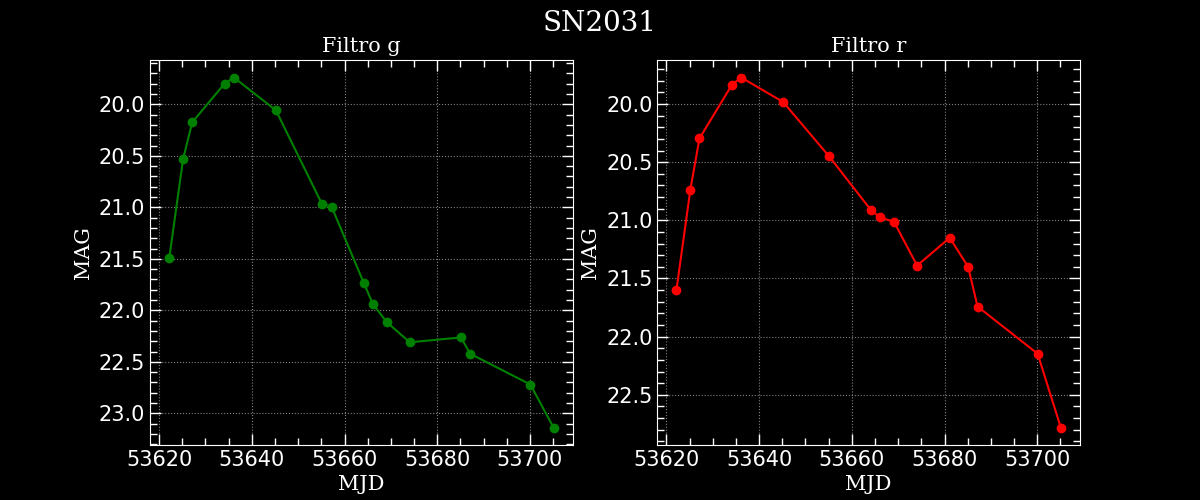

c:\users\gabriel wendell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
c:\users\gabriel wendell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\gabriel wendell\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [24]:
plt.style.use('dark_background')
f, (ax1, ax2) = plt.subplots(1,2, sharex = True)
f.set_size_inches(12, 5)

f.suptitle(SNid, fontsize=20, family='serif')
f.subplots_adjust(hspace=0)

ax1.plot(df_g['MJD'], df_g['MAG'], 'o-g')
ax1.invert_yaxis()
ax1.set_title('Filtro g', fontsize=15, family='serif')
ax1.set_xlabel('MJD', fontsize=15, family='serif')
ax1.set_ylabel('MAG', fontsize=15, family='serif')
ax1.grid(True, linestyle=':', color='0.50')
ax1.minorticks_on()
ax1.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,labelsize=15)
ax1.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,labelsize=15)

ax2.plot(df_r['MJD'], df_r['MAG'], 'o-r')
ax2.invert_yaxis()
ax2.set_title('Filtro r', fontsize=15, family='serif')
ax2.set_xlabel('MJD', fontsize=15, family='serif')
ax2.set_ylabel('MAG', fontsize=15, family='serif')
ax2.grid(True, linestyle=':', color='0.50')
ax2.minorticks_on()
ax2.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,labelsize=15)
ax2.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,labelsize=15)

plt.savefig(SNid+' Curva de luz - Filtros g e r.png')

Este gráfico mostra muito bem o aumento do brilho aparente da supernova até atingir um máximo a partir do qual diminui mais lentamente. É nesse máximo que sua magnitude absoluta atinge um valor conhecido, que é o que nos permitirá estimar a distância que está de nós.

As datas estão no formato MJD (**M**odified **J**ulian **D**ate). As unidades são dias, então também podemos ter uma ideia da duração da supernova. O aumento repentino no brilho aparente seguido por sua queda abrupta é claramente perceptível em um périodo de apenas um mês. O período de tempo total registrado é de 90 dias.

### 2.5 Obtenção das magnitudes aparentes mínimas

Uma vez de posso do dataframe com os dados de todas as curvas de luz, vamos construir o diagrama de Hubble para essas supernovas. Uma determinação rigorosa das distâncias exigiria a comparação das curvas de luz disponíveis com um conjunto de curvas "padrão" e a aplicação de correções para determinar a magnitude absoluta máxima. Neste `Notebook`, iremos nos limitar a criar um dataframe selecionando a observação do maior brilho aparente (isto é, o valor mínimo da magnitude aparente correspondente) nos filtros `g` r `r`, o valor de `Z` e o identidicador da supernova (`id`). 

In [25]:
b = df['FILT'] == 1                     # Seleciona o filtro 'g'
dftemp1 = df.loc[b, ['MAG', 'Z', 'SN']]
dftemp1.columns = ['g', 'Z', 'SN']
grouped = dftemp1.groupby('SN')          # Agrupamento pelo 'id' da supernova
df_g = grouped.min()                     # Seleciona os valores mínimo

#######################################

b = df['FILT'] == 2                      # Seleciona o filtro 'r'
dftemp2 = df.loc[b, ['MAG', 'SN']]
dftemp2.columns = ['r', 'SN']
grouped = dftemp2.groupby('SN')          # Agrupamento pelo 'id' da supernova
df_r = grouped.min()                     # Seleciona os valores mínimos da magnitude

Finalmente, as colunas dos dois dataframes anteriores são concatenadas. O `Pandas` se encarregará de alinhar os valores correspondentes à mesma supernova:

In [26]:
df_gr = pd.concat([df_g, df_r], axis=1)
df_gr['g'] = df_gr['g'].astype(np.float)
df_gr['r'] = df_gr['r'].astype(np.float)
df_gr = df_gr[['Z', 'g', 'r']]
df_gr.head()

,Z,g,r
SN,,,
SN10028,0.06533,18.292,18.354
SN10096,0.07775,20.323,19.904
SN10106,0.14720,20.844,20.665
SN1032,0.12975,20.410,20.205
SN10434,0.10430,19.432,19.369


### 2.6 Correção da extinção

O fenômeno da **extinção interestelar** é o escurecimento da luz que nos chega dos objetos celestes, devido à sua absorção e dipersão mais ou menos intensa pelas nuves de poeira cósmica existentes no meio interestelar. Consequentemente, os objetos celestes aparentam estar menos brilhantes para nós e, portanto, mais distantes do que corresponderia à distância em que eles estão relmente localizados.

Portanto, devemos aplicar uma correção aos valores das magnitudes aparentes em cada um dos filtros, subtraindo em cada caso uma constante $A_{\lambda}<0$ cujo efeito será obter uma magnitude menor, ou seja, correspondente a um objeto mais brilhante, do que seria a magnitude aparente que observaríamos se a extinção não existisse. Podemos aplicar a fórmula do módulo da distância a esta nova magnitude para obter uma mehor aproximação da distância que o separa de nós.

Vejamos um exemplo: a supernova `SN722` tem sua magnitude mais baixa na banda do filtro `g` com um valor de `g = 19.394`. A correção de extinção para sua galáxia hospedeira nos comprimentos de onda desse filtro é $A_{g}=0,10$. Vamos estimar sua distância, sem e com a aplicação da correção.

In [27]:
df_gr.loc['SN722',:]

Z     0.08658
g    19.39400
r    19.19400
Name: SN722, dtype: float64

In [28]:
M = -19.3
m = 19.394
k = (m-M)/5 - 5
d = 10**k
print('Distância sem correção: %.2f Mpc' %d)

A = 0.10
m -= A
k = (m-M)/5 - 5
d = 10**k
print('Distância com correção: %.2f Mpc' %d)

Distância sem correção: 548.02 Mpc
Distância com correção: 523.36 Mpc


Podemos ter certeza que essas correções ainda não foram aplicadas, pois no cabeçalho de cada arquivo de curva de luz há o comentário "*NO extinction correction applied to mags or fluxes*".

O problema que temos que resolver agora pe obter as correções de extinnção para cada supernova e banda. Esses dados aparecem no cabeçalho de cada arquivo, na linha 11 (contando a partir de 1) existe uma linha do tipo:

`SFD extinctions [ugriz] = [  0.13  0.10  0.07  0.05  0.04 ]`

Então vamos ler cada arquivo e obter os valores de correção para cada supernova.

In [29]:
lc_files = !ls Dados/SDSS_Light_Curves
lc_files = list(lc_files.n.split('\n'))
lc_files = lc_files[1:]

Agora criamos uma lista com os nomes das supernovas obtidos da lista de nomes dos arquivos:

In [30]:
SN = lambda filename: re.search(r'\w+', filename).group()

Criamos então uma lista com os valores do índice e as colunas do dataframe para criar com as extinções para cada SN e cada filtro:

In [31]:
index = [SN(filename) for filename in lc_files]
columns = ['Au', 'Ag', 'Ar', 'Ai', 'Az']

Por fim, criamos um dataframe vazio, mas com a estrutura que precisamos:

In [32]:
df_ext = pd.DataFrame(index=index, columns=columns)
df_ext.head()

,Au,Ag,Ar,Ai,Az
SN10028,NaN,NaN,NaN,NaN,NaN
SN10096,NaN,NaN,NaN,NaN,NaN
SN10106,NaN,NaN,NaN,NaN,NaN
SN1032,NaN,NaN,NaN,NaN,NaN
SN10434,NaN,NaN,NaN,NaN,NaN


Finalmente todos os arquivos são percorridos extraindo os valores de extinção e preenchendo o dataframe `df_ext`:

In [33]:
for filename in lc_files:
    id = SN(filename)
    with open('Dados/SDSS_Light_Curves/' + filename) as f:
        for line in f:
            if 'extinctions' in line:
                l_field = line.split()
                
                df_ext.loc[id] = [float(a) for a in l_field[6:11]]
                break

Agora vamos a uma rápida comprovação:

In [34]:
df_ext.head()

,Au,Ag,Ar,Ai,Az
SN10028,0.13,0.1,0.07,0.05,0.04
SN10096,0.14,0.1,0.07,0.06,0.04
SN10106,0.38,0.28,0.2,0.15,0.11
SN1032,0.38,0.28,0.2,0.15,0.11
SN10434,0.48,0.36,0.26,0.2,0.14


Assim que todas as correções de extinção estiverem disponíveis, as magnitudes aparentes dos filtros `g` e `r` serão corrigidas no dataframe `df_gr`, que era aquele que continha os valores mínimos da magnitude aparente em cada um desses dois filtros para cada supernova. A correção consitirá simplemente em subtrair de cada magnitude aparente o valor de correção para aquele filtro e supernova.

Façamos uma cópia "profunda" do dataframe original, isto é, com uma cópia dos dados:

In [35]:
df_gr_ext = df_gr.copy()

Agora aplicamos as correções de extinção:

In [36]:
df_gr_ext['g'] = df_gr['g'] - df_ext['Ag']
df_gr_ext['r'] = df_gr['r'] - df_ext['Ar']

In [37]:
df_gr_ext.head()

,Z,g,r
SN,,,
SN10028,0.06533,18.192,18.284
SN10096,0.07775,20.223,19.834
SN10106,0.14720,20.564,20.465
SN1032,0.12975,20.13,20.005
SN10434,0.10430,19.072,19.109


### 2.7 Correção devido ao sistema fotométrico utilizado

Há ainda outra correção que iremos realizar. É devido ao fato de que serão utilizados os valores de magnitude absoluta máxima $M=-19,3$, que é um valor válido para os filtros $B$ ou $V$ do sistema fotométrico $UBV$ [2], mas aqui estamos usando o sistema de filtros do SDSS, que por sua vez é diferente.

Uma forma de levar em conta esse fato é fazer uma conversão entre as quantidades do sistema "ugriz" do SDSS e as quantidades do sistema UBV. Existem vários algoritmos que podem ser [consultados nesta página](http://classic.sdss.org/dr7/algorithms/sdssUBVRITransform.html) [14]. Iremos usar, por exemplo, a transformação de [Lupton (2005)](https://www.sdss.org/dr16/algorithms/sdssUBVRITransform/#Lupton2005), embora não esteja muito claro se está é a transformação mais adequada neste caso. Por outro lado, a realização desta conversçao tem a vantagem adicional de que no cálculo de, por exemplo, a magnitude no filtro $V$ as magnitudes aparentes dos filtros `g` e `r` do SDSS intervêm, com o qual estaremos pegando uma espécie de "média" entre os dois filtros. 

Aqui está a fórmula a ser usada:

$$\boxed{V = g - 0.5784\cdot(g - r) - 0.0038}$$

Agora vamos expandir o dataframe anterior `df_gr_ext`, que já tinha as correções de extinção integradas, criando uma nova coluna calculada com a fórmula acima:

In [38]:
df_gr_ext['V'] = df_gr_ext['g'] - 0.5784 * (df_gr_ext['g'] - df_gr_ext['r']) - 0.0038
df_gr_ext.head()

,Z,g,r,V
SN,,,,
SN10028,0.06533,18.192,18.284,18.241413
SN10096,0.07775,20.223,19.834,19.994202
SN10106,0.14720,20.564,20.465,20.502938
SN1032,0.12975,20.13,20.005,20.0539
SN10434,0.10430,19.072,19.109,19.089601


### 2.8 Obtenção do diagrama de Hubble

#### 2.8.1 Determinação das velocidade de recessão

Vamos primeiro examinar a faixa de valores de $z$ para supernovas na pesquisa do SDSS:

In [39]:
df_gr_ext['Z'].min(), df_gr_ext['Z'].max()

(0.01306, 0.422)

Isso nos diz que existe pelo menos uma observação com valor de $z=0,42$, ou seja, se usarmos neste caso a aproximação $v=zc$ teríamos um objeto que se moveria a 42% da velocidade da luz, que constitui uma velocidade relativística. Isso significa que o uso desta aproximação não é válido em casos como este se interpretarmos o resultado como a velocidade de recessão real da supernova em relação a nós.

No entanto, como vimos, a constante de Hubble, para altos valores do parâmetro $z$, ainda é definida como:

$$\boxed{H_{0}=\frac{cz}{d}}$$

Portanto, usarei, como de costume, $cz$ na realização do diagrama de Hubble, embora essa magnitude não deva ser interpretada em geral como a velocidade real de recessão da supernova, mas apenas como uma aproximação dessa velocidade para $z$ pequeno. A relação exata entre a taxa de recessão devido à expansão do universo e a quantidade $z$ do *redshift* depende do modelo do universo que está sendo considerado e requer o uso da *Relatividade Geral*. A esse respeito, consulte o seguinte artigo: [Expanding Confusion: common misconceptions of cosmological horizons and the superluminal expansion of the Universe](https://arxiv.org/abs/astro-ph/0310808) [15] de Tamara M. Davis & Charles H. Lineweaver (2003).

In [40]:
z = df_gr_ext['Z']
v = z * pq.c.rescale(pq.km/pq.s).magnitude 

#### 2.8.2 Cálculo das distâncias

Para as distâncias vamos utilizar a expressão do módulo de distância quando as distâncias $d$ são medidas em Mpc:

$$\boxed{\mu=m-M=5\log_{10}{d}+25}$$

Tomando como a magnitude absoluta de qualquer supernova do tipo Ia: $M=-19,3$ e $m$ sendo o valor da magniude aparente máxima (o menor valor) retirado do dataframe:

In [41]:
M = -19.3
# m = df_gr_ext['V']
m = df_gr_ext['V'].astype(np.float)
k = (m-M)/5 - 5
d = 10**k

#### 2.8.3 Obteção de $H_{0}$ e o diagrama de Hubble

Agora vamos ajustar uma linha por mínimos quadrados aos valores de distâncias e velocidades:

In [42]:
slope, intercept, r_value, p_value, std_err = s.linregress(d,v)

print('Coeficiente de determinação = %.2f' %r_value**2)
print('H0 = %.2f' %slope)

Coeficiente de determinação = 0.86
H0 = 60.71


Antes de proseguirmos para o diagrama, vamos definir uma função que irá melhorar um pouco a estética do mesmo (nós já aplicamos essa mesma função nos plots das curvas de luz):

In [43]:
def opt_plot():
    plt.style.use('dark_background')
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                        top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                        top = True,right = True, length=8,width=1,labelsize=15)

Finalmente, vamos ao diagrama de Hubble propriamente dito:

<IPython.core.display.Javascript object>


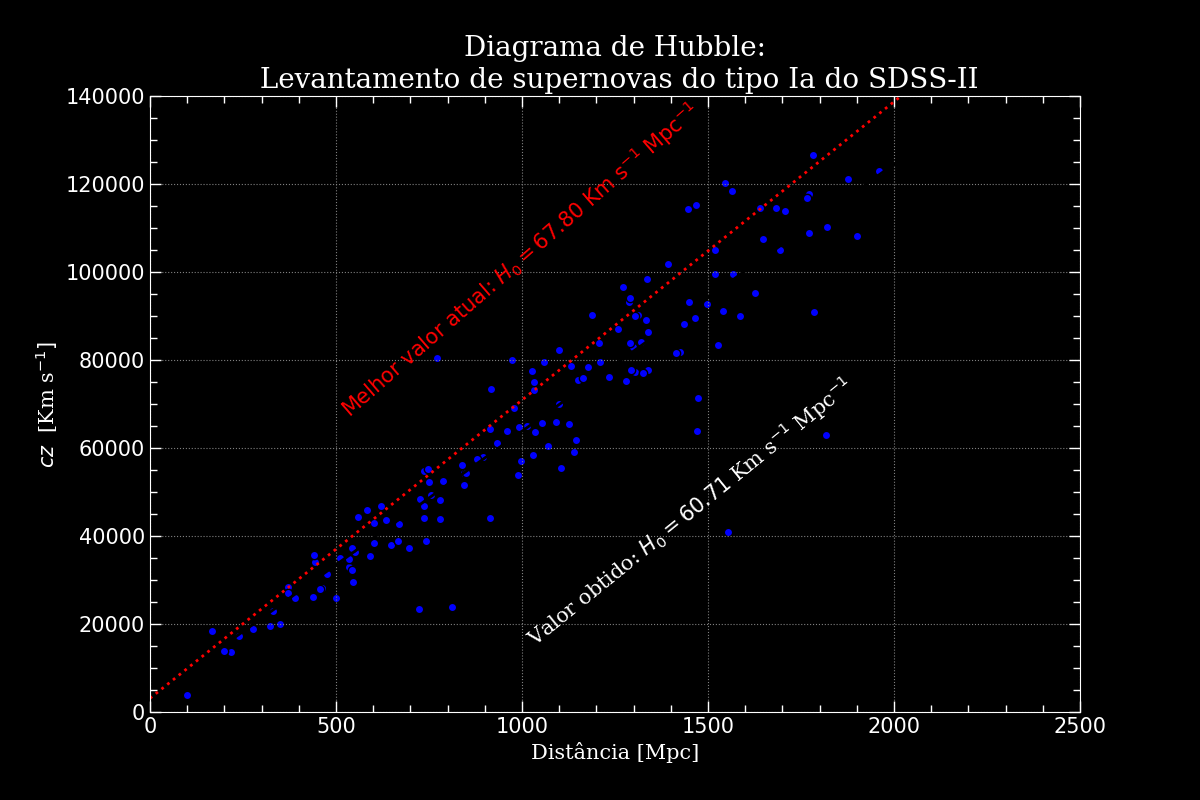

In [44]:
plt.figure(figsize=(12,8))

plt.scatter(d, v, color='blue', edgecolors='black')
plt.xlim(0, 2500)
plt.ylim(0, 140000)

plt.title('Diagrama de Hubble:\n Levantamento de supernovas do tipo Ia do SDSS-II', fontsize=20, family='serif')
plt.xlabel('Distância [Mpc]', fontsize=15, family='serif')
plt.ylabel(r'$cz$  [Km s$^{-1}]$', fontsize=15, family='serif')

plt.plot([0, 3000], [intercept, slope * 3000 + intercept], '-k', lw=2)
plt.text(1000, 15000, 'Valor obtido: $H_{0}=%.2f$ Km s$^{-1}$ Mpc$^{-1}$' %slope,
        fontsize=15, family='serif', rotation=39)

plt.plot([0,3000], [intercept, 67.80 * 3000 + intercept], ':r', lw=2)
plt.text(500, 67000, 'Melhor valor atual: $H_{0}=67.80$ Km s$^{-1}$ Mpc$^{-1}$',
        fontsize=15, rotation = 41, color='r')

opt_plot()
plt.savefig('Diagrama de Hubble Levantamento de supernovas do tipo Ia do SDSS-II.png')

Como pode ser visto, u  valor inferior ao melhor valor atual foi obtido em aproximadamente 10%, o que considero uma boa aproximação dado que o método muito básico que tem sido usado para obter a magnitude aparente correspondente ao momento de radiação máxima das supernovas estudadas. A este respeito, pode ser interessante ler a história agitada da determinação de $H_{0}$ no artigo [*The Ups and Downs of the Hubble Constant*](https://arxiv.org/abs/astro-ph/0512584) de G.A. Tammann (2005) [16]. Demorou cerca de 75 anos para se obter um valor de $H_{0}$ com uma incerteza de menos de 10%.

---

## Referências

- [1] *Sloan Digital Sky Survey* : http://skyserver.sdss.org/dr10/en/home.aspx

- [2] *A cor dos objetos celestes* : https://github.com/GabrielWendell/PET.py/blob/main/Notebooks/A%20cor%20dos%20objetos%20celestes.ipynb

- [3] *Astronomia & Astrofísica / Kepler de Souza Oliveira Filho, Maria de Fátima Oliveira Saraiva - 4.ed.* : Capítulos 20 (p.157), 21 (p.175), 22 (p.193) & 23 (p.231);

- [4] *Astronomia & Astrofísica / Kepler de Souza Oliveira Filho, Maria de Fátima Oliveira Saraiva - 4.ed.* : Capítulos 24 (p.453), 25 (p.455), 26 (p.475) & 27 (p.501);

- [5] *Extragalactic Astronomy and Cosmology - An Introduction / Peter Schneider - Springer (2006)*: https://link.springer.com/book/10.1007/978-3-642-54083-7

- [6] *The SDSS Supernova Survey - Publications*: http://classic.sdss.org/supernova/

- [7] *SDSS-II Supernova Survey Data*: http://www.sdss3.org/dr10/data_access/supernovae.php

- [8] *Confirmed SDSS-II Supernovae*: http://classic.sdss.org/supernova/snlist_confirmed.html

- [9] *What Is a Supernova?*: https://spaceplace.nasa.gov/supernova/en/

- [10] *Classifying Supernovae*: https://astrobites.org/2016/12/02/classifying-supernovae/

- [11] *Phillips, M. M.; The Absolute Magnitudes of Type Ia Supernovae; ApJ: 1993, Aug, Vol. 413, L105*: http://articles.adsabs.harvard.edu/pdf/1993ApJ...413L.105P

- [12] *Jon. A. Holtzman et al; The Sloan Digital Sky Survey-II: Photometry and Supernova Ia Light Curves from the 2005 data; AJ, Aug. 2009, 136, 2306*: https://arxiv.org/abs/0908.4277

- [13] *The SDSS Supernova Survey: Light Curves*: http://classic.sdss.org/supernova/lightcurves.html

- [14] *Transformations between SDSS magnitudes and other systems*: http://classic.sdss.org/dr7/algorithms/sdssUBVRITransform.html

- [15] *Tamara M. Davis, Charles H. Lineweaver; Expanding Confusion: common misconceptions of cosmological horizons and the superluminal expansion of the Universe, Astrophysics (astro-ph), Nov. 2003*: https://arxiv.org/abs/astro-ph/0310808

- [16] *G.A. Tammann; The Ups and Downs of the Hubble Constant; Astrophysics (astro-ph), Dec. 2005* : https://arxiv.org/abs/astro-ph/0512584